<a href="https://colab.research.google.com/github/SrihithaReddy13/100-days-of-code/blob/master/User_Profile_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

IMPORTING DATASET

In [366]:
df=pd.read_excel("User Profile Matching in Social Networks (Responses).xlsx")
df.head()

,Timestamp,Email Address,Name,Age,Zodiac,Gender,I'm an,I prefer,Books or Movies( Movies include TV Shows),Books or Movie Genre,"Music. Yeah yeah, there are over 900 types. Now just pick one from here...",Cook or Take out,Pets
0,2020-09-08 13:34:27.905,nandithankumar@gmail.com,Nanditha Menon,21,Leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Crime, Drama, Fantasy","Pop, Hip Hop, EDM",Both,Dogs
1,2020-09-08 14:43:00.455,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs
2,2020-09-08 14:44:08.342,meghanab2000@gmail.com,B Meghana,21,Pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Crime, Historical, Romance, Science Fiction","Hip Hop, Bollywood",Cook,No pets
3,2020-09-08 14:45:07.497,sayoojsanthosh21@gmail.com,Sayooj,20,NaN,Male,Ambivert,The great Outdoors,Movies,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Jazz, Rock Music, Country, Rap",Both,Both
4,2020-09-08 14:45:54.144,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs


In [367]:
df.columns=["timestamp","email","name","age","sunSign","gender","character","preferance","TV","genres","music","food","pets"]

CLEANING THE DATA

In [368]:
df.nunique()

timestamp     108
email         102
name          103
age            24
sunSign        27
gender          4
character       3
preferance      2
TV              3
genres        101
music          75
food            3
pets            9
dtype: int64

In [369]:
df.drop_duplicates(subset=["email"],inplace=True)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 107
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   102 non-null    datetime64[ns]
 1   email       102 non-null    object        
 2   name        102 non-null    object        
 3   age         102 non-null    int64         
 4   sunSign     90 non-null     object        
 5   gender      102 non-null    object        
 6   character   102 non-null    object        
 7   preferance  102 non-null    object        
 8   TV          102 non-null    object        
 9   genres      102 non-null    object        
 10  music       102 non-null    object        
 11  food        102 non-null    object        
 12  pets        102 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 11.2+ KB


In [371]:
df.head()

,timestamp,email,name,age,sunSign,gender,character,preferance,TV,genres,music,food,pets
0,2020-09-08 13:34:27.905,nandithankumar@gmail.com,Nanditha Menon,21,Leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Crime, Drama, Fantasy","Pop, Hip Hop, EDM",Both,Dogs
1,2020-09-08 14:43:00.455,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs
2,2020-09-08 14:44:08.342,meghanab2000@gmail.com,B Meghana,21,Pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Crime, Historical, Romance, Science Fiction","Hip Hop, Bollywood",Cook,No pets
3,2020-09-08 14:45:07.497,sayoojsanthosh21@gmail.com,Sayooj,20,NaN,Male,Ambivert,The great Outdoors,Movies,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Jazz, Rock Music, Country, Rap",Both,Both
5,2020-09-08 14:46:19.024,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,Pisces,Male,Ambivert,Warm and cozy Indoors.,Both,"Comedy Genre, Historical, Romance, Science Fic...","Jazz, Country, Pop, EDM",Both,Dogs


EXPLORATORAY DATA ANALYSIS

Gender Count Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



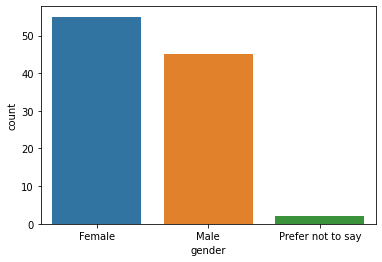

In [372]:
sns.countplot(df.gender)

Handling the Zodiac Sign column data

In [373]:
df.sunSign.unique()

array(['Leo', 'Aries', 'Pisces ', nan, 'Taurus', 'Gemini', 'Taurus ',
       'SAGITTARIUS', 'Cancer', '-', 'Libra', 'Capricorn ', 'Pisces',
       'Sagittarius', 'Capricon', 'Virgo',
       'Aquarius (according to tamil zodiac system)', 'Sagittarius ',
       'Capricorn', 'CANCER', 'pisces', 'Aquarius', 'No idea 😅',
       'Aquarius ', 'Gemini ', 'Scorpio', 'Scorpio '], dtype=object)

In [374]:
for i in range(108):
  try:
    df["sunSign"][i]=df["sunSign"][i].lower()
    temp=df["sunSign"][i].split(" ")
    df["sunSign"][i]=temp[0]
    if df["sunSign"][i] not in ("aries","taurus","leo","cancer","pisces","scorpio","libra","capricorn","virgo","sagittarius","gemini","aquarius"):
      df['sunSign'][i]="Not known"
  except:
    df['sunSign'][i]="Not known"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying t

Zodiac Count Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

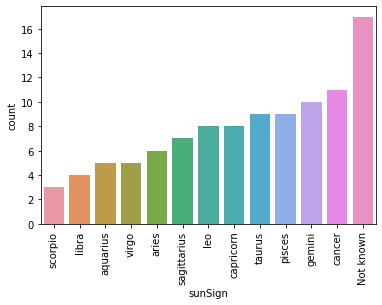

In [375]:
order = df['sunSign'].value_counts(ascending=True).index
sns.countplot(x='sunSign', data=df, order=order)
plt.xticks(rotation=90)

Observation - Not many people seem to focus on their zodiac sign

Since not many people care about their zodiac sign, the weightage assigned to zodiac sign can be less compared to the other attributes.

Personality Count Plot

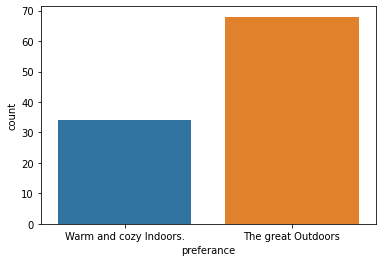

In [376]:
order = df['preferance'].value_counts(ascending=True).index
sns.countplot(x='preferance', data=df, order=order)

Age Visual Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



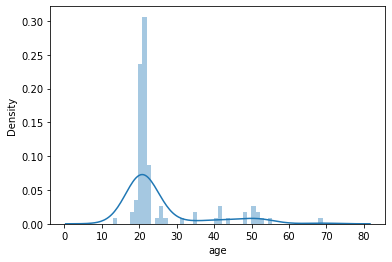

In [377]:
sns.distplot(df.age)

The age is concentrate in the 20 and 21 but I think it is becuase the data is mostly collected from our collegemates.

Social Preferences

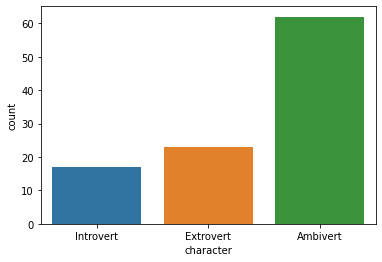

In [378]:
order = df['character'].value_counts(ascending=True).index
sns.countplot(x='character', data=df, order=order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



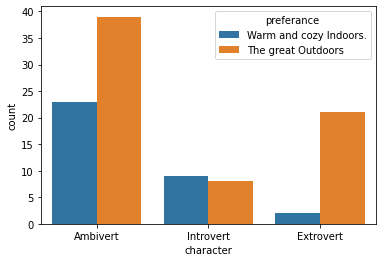

In [379]:
sns.countplot(df.character, hue=df.preferance)

Introverts seem to not mind outdoor or indoor while leaning to the indoor. 
Ambiverts and extroverts have an outdoor prefernace.

Entertainment Preferences

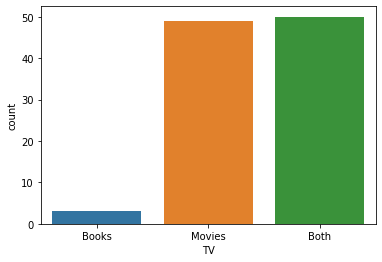

In [380]:
order = df['TV'].value_counts(ascending=True).index
sns.countplot(x='TV', data=df, order=order)

There is a general liking towards TV shows compared to books. People who like only books seem to be very low.

Food Preferences


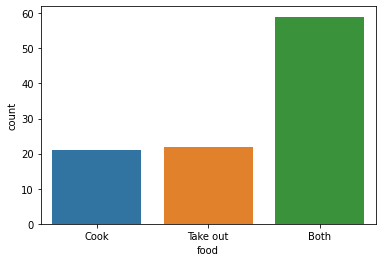

In [381]:
order = df['food'].value_counts(ascending=True).index
sns.countplot(x='food', data=df, order=order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



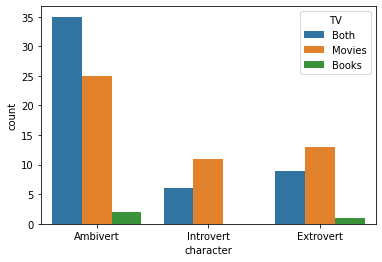

In [382]:
sns.countplot(df.character, hue=df.TV)

Handling Pets column data

In [383]:
for i in range(108):
  try:
    if df["pets"][i] not in ("Dogs","Cats","No pets"):
      df["pets"][i]="Other pets"
  except:
    pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pet Preferences


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



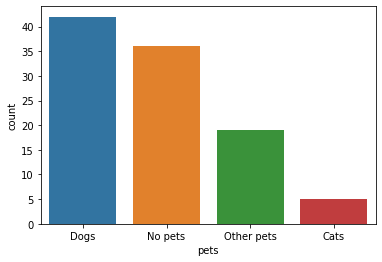

In [384]:
sns.countplot(df.pets)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



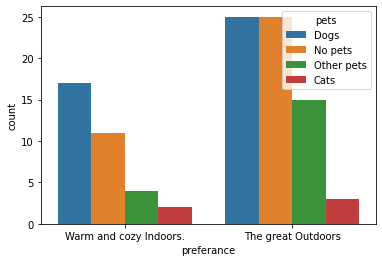

In [385]:
sns.countplot(df.preferance,hue=df.pets)

Handling TV Show Genre column data

In [386]:
listGenres=set(["Action Genre","Animation","Comedy Genre","Crime","Drama","Experimental","Fantasy","Historical","Horror","Romance","Science Fiction","Thriller","Western","Anime"])
for i in range(108):
  try:
    temp=df["genres"][i]
    temp=temp.split(",")
    temp=[j.strip() for j in temp]
    for k in range(len(temp)):
      if temp[k] not in listGenres:
        temp[k]="other TVShow Genre"
    df["genres"][i]=temp
  except:
    pass
listGenres.add("otherTVShowGenre")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
for i in listGenres:
  temp_list=[]
  for j in range(108):
    try:
      if i in df["genres"][j]:
        temp_list.append(1)
      else:
        temp_list.append(0)
    except:
      pass
  df[i]=temp_list

In [388]:
df.drop(labels="genres",axis=1,inplace=True)
df.head()

,timestamp,email,name,age,sunSign,gender,character,preferance,TV,music,food,pets,Science Fiction,otherTVShowGenre,Thriller,Western,Drama,Romance,Experimental,Historical,Horror,Crime,Animation,Comedy Genre,Anime,Fantasy,Action Genre
0,2020-09-08 13:34:27.905,nandithankumar@gmail.com,Nanditha Menon,21,leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Pop, Hip Hop, EDM",Both,Dogs,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,2020-09-08 14:43:00.455,titusaishu@gmail.com,Aishwarya Titus,21,aries,Female,Ambivert,The great Outdoors,Both,"Blues, Country, Pop, Hip Hop, EDM",Both,Dogs,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1
2,2020-09-08 14:44:08.342,meghanab2000@gmail.com,B Meghana,21,pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Hip Hop, Bollywood",Cook,No pets,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,2020-09-08 14:45:07.497,sayoojsanthosh21@gmail.com,Sayooj,20,Not known,Male,Ambivert,The great Outdoors,Movies,"Blues, Jazz, Rock Music, Country, Rap",Both,Other pets,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1
5,2020-09-08 14:46:19.024,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,pisces,Male,Ambivert,Warm and cozy Indoors.,Both,"Jazz, Country, Pop, EDM",Both,Dogs,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0


TV Genre Preferences


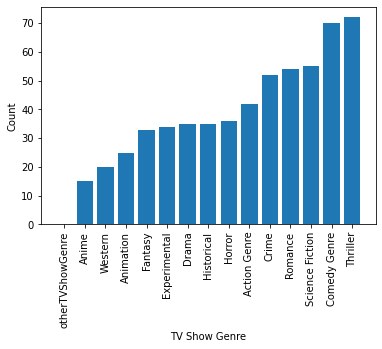

In [389]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
# Counting the Genres of TV Shows and Movies for each person and summing them up
genreCount=[]
for i in listGenres:
  genreCount.append(df[i].sum())
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    l1 = [y for x, y in sorted(zipped_pairs)]
    return l1
listGenres=sort_list(listGenres,genreCount)
genreCount.sort()
ax.bar(listGenres, genreCount)  
ax.set_xlabel('TV Show Genre')  
ax.set_ylabel('Count')  
plt.xticks(rotation=90)
plt.show()  

Handling Music Genre column data

In [390]:
listMusicGenres=set(["Blues","Jazz","Rock Music","Country","Pop","Hip Hop","EDM","K-POP","Rap"])
for i in range(108):
  try:
    temp=df["music"][i]
    temp=temp.split(",")
    temp=[j.strip() for j in temp]
    for k in range(len(temp)):
      if temp[k] not in listMusicGenres:
        temp[k]="otherMusic"
    df["music"][i]=temp
  except:
    pass
listMusicGenres.add("otherMusic")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [391]:
for i in listMusicGenres:
  temp_list=[]
  for j in range(108):
    try:
      if i in df["music"][j]:
        temp_list.append(1)
      else:
        temp_list.append(0)
    except:
      pass
  df[i]=temp_list

In [392]:
df.drop(labels="music",axis=1,inplace=True)
df.head()

,timestamp,email,name,age,sunSign,gender,character,preferance,TV,food,pets,Science Fiction,otherTVShowGenre,Thriller,Western,Drama,Romance,Experimental,Historical,Horror,Crime,Animation,Comedy Genre,Anime,Fantasy,Action Genre,Rock Music,Pop,EDM,Country,K-POP,Blues,Rap,otherMusic,Jazz,Hip Hop
0,2020-09-08 13:34:27.905,nandithankumar@gmail.com,Nanditha Menon,21,leo,Female,Ambivert,Warm and cozy Indoors.,Both,Both,Dogs,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
1,2020-09-08 14:43:00.455,titusaishu@gmail.com,Aishwarya Titus,21,aries,Female,Ambivert,The great Outdoors,Both,Both,Dogs,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1
2,2020-09-08 14:44:08.342,meghanab2000@gmail.com,B Meghana,21,pisces,Female,Introvert,Warm and cozy Indoors.,Movies,Cook,No pets,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2020-09-08 14:45:07.497,sayoojsanthosh21@gmail.com,Sayooj,20,Not known,Male,Ambivert,The great Outdoors,Movies,Both,Other pets,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0
5,2020-09-08 14:46:19.024,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,pisces,Male,Ambivert,Warm and cozy Indoors.,Both,Both,Dogs,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0


Music Preferences


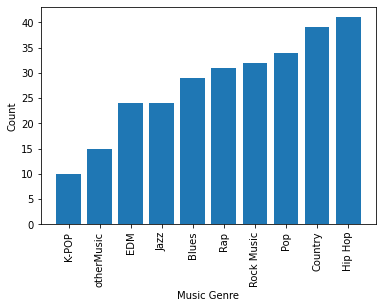

In [393]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
# Counting Music genres in the same way as TV Show Genres
musicGenreCount=[]
for i in listMusicGenres:
  musicGenreCount.append(df[i].sum())
# Plotting the bar graph  
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    l1 = [y for x, y in sorted(zipped_pairs)]
    return l1
listMusicGenres=sort_list(listMusicGenres,musicGenreCount)
musicGenreCount.sort()
ax.bar(listMusicGenres, musicGenreCount)  
ax.set_xlabel('Music Genre')  
ax.set_ylabel('Count')  
plt.xticks(rotation=90)
plt.show()  

ENCODING OTHER CATEGORICAL DATA FOR CORRELATION

In [394]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df['sunSign']= label_encoder.fit_transform(df['sunSign']) 
df['gender']= label_encoder.fit_transform(df['gender']) 
df['character']= label_encoder.fit_transform(df['character']) 
df['preferance']= label_encoder.fit_transform(df['preferance']) 
df['TV']= label_encoder.fit_transform(df['TV']) 
df['food']= label_encoder.fit_transform(df['food']) 
df['pets']= label_encoder.fit_transform(df['pets']) 

In [395]:
temp=df.iloc[:,3:]
temp

,age,sunSign,gender,character,preferance,TV,food,pets,Science Fiction,otherTVShowGenre,Thriller,Western,Drama,Romance,Experimental,Historical,Horror,Crime,Animation,Comedy Genre,Anime,Fantasy,Action Genre,Rock Music,Pop,EDM,Country,K-POP,Blues,Rap,otherMusic,Jazz,Hip Hop
0,21,6,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
1,21,2,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1
2,21,8,0,2,1,2,1,2,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,20,0,1,0,0,2,0,3,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0
5,20,8,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,52,4,0,2,0,2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
103,53,11,1,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
105,21,6,1,0,0,1,0,3,1,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1
106,48,12,1,0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1


CORRELATION HEATMAP

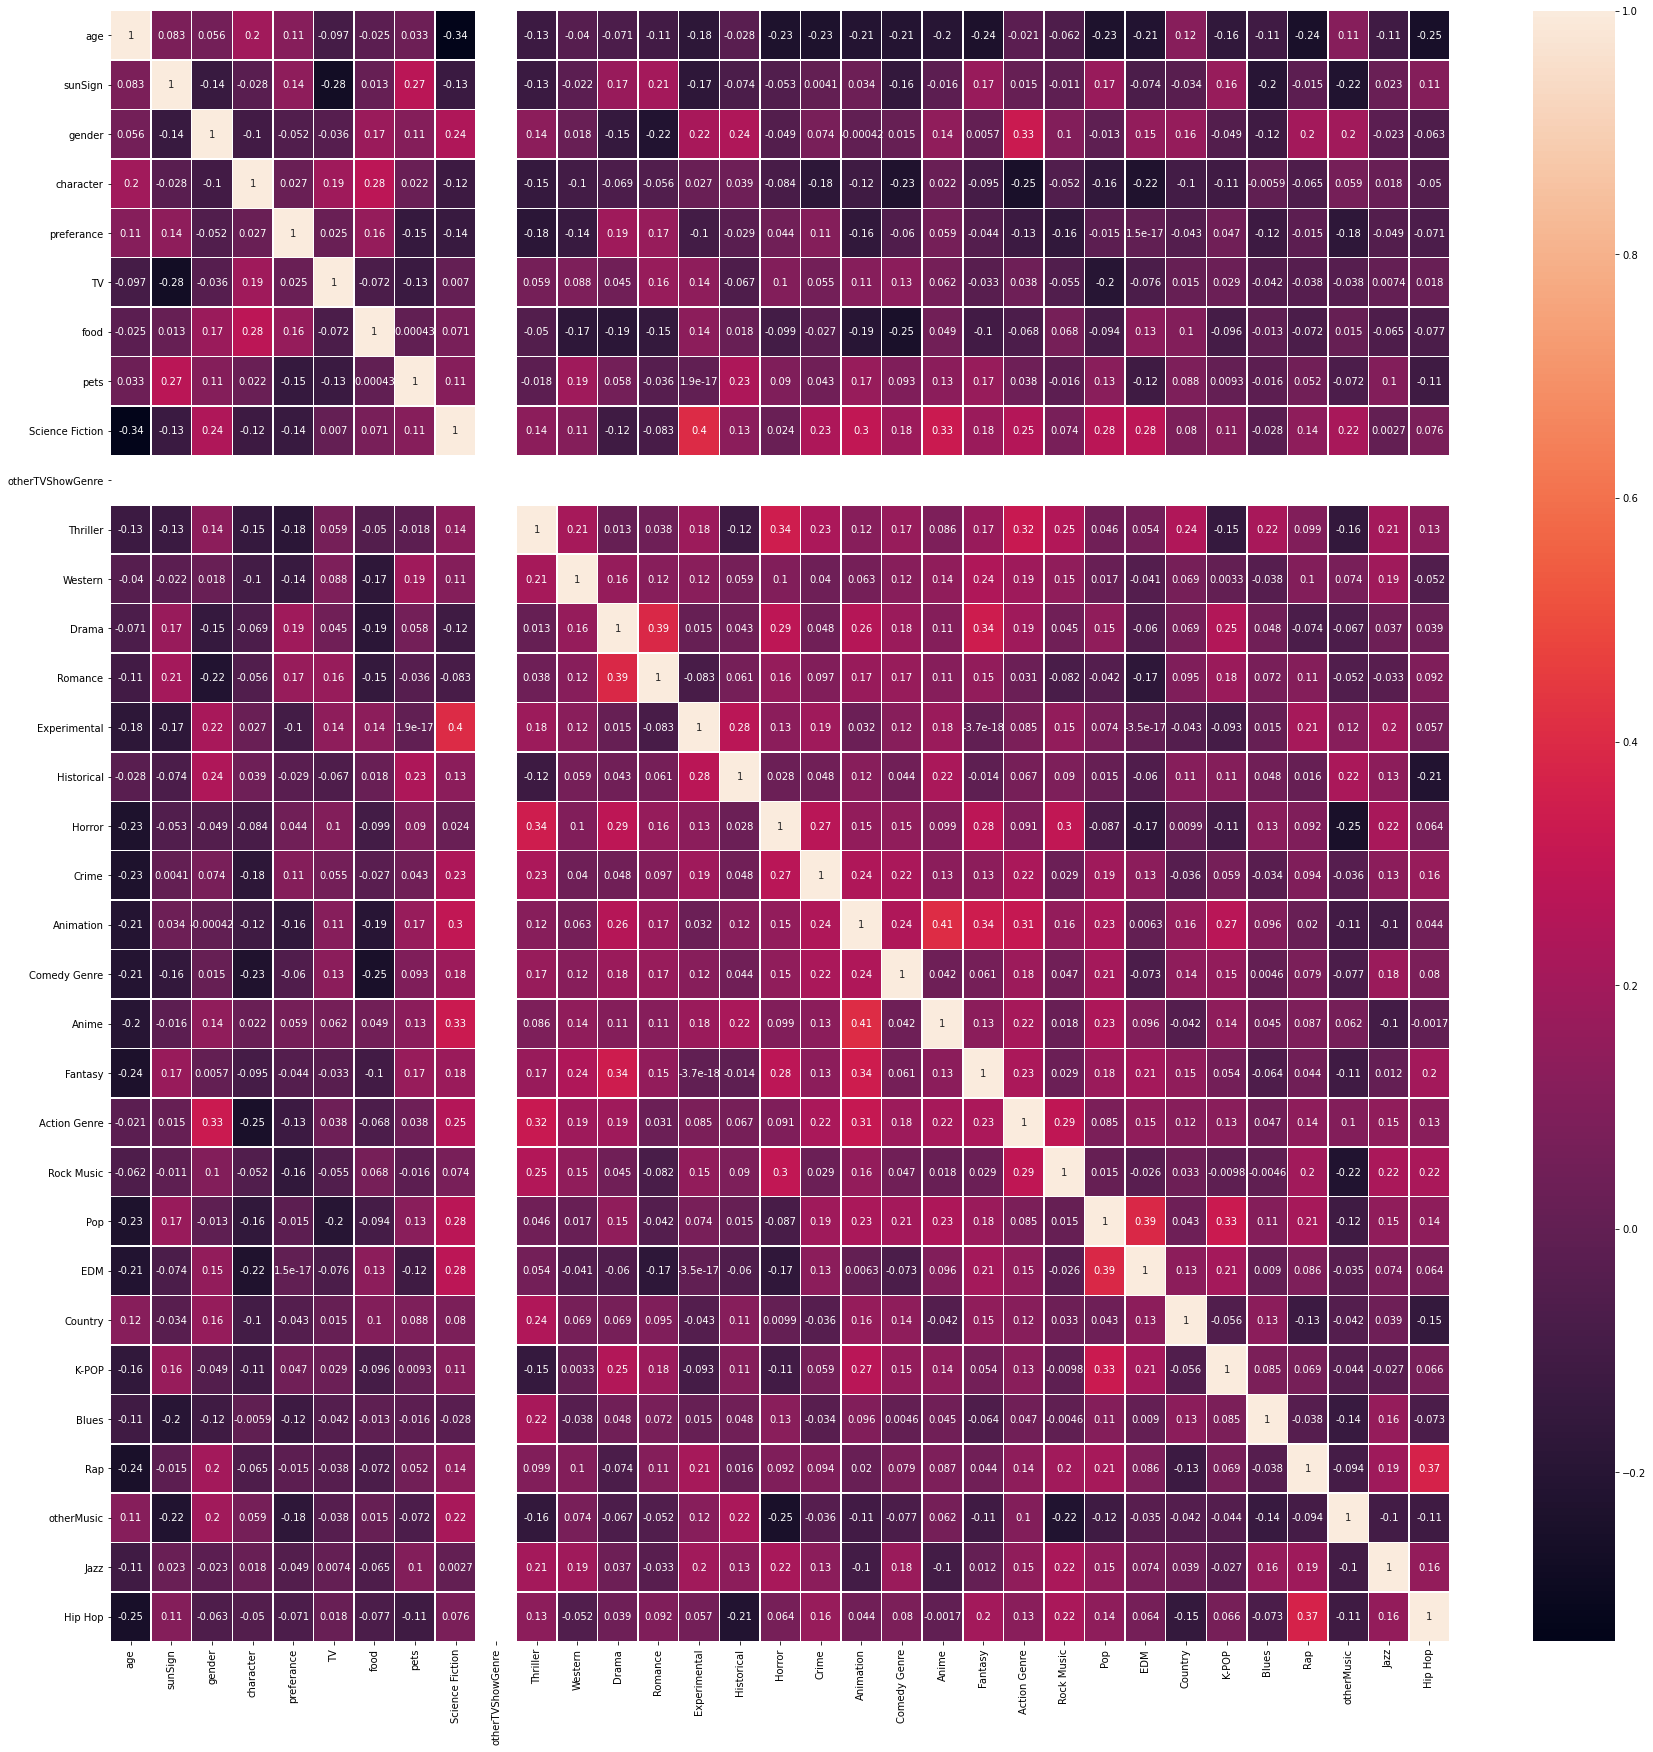

In [396]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30))     
sns.heatmap(df.iloc[:, 3:].corr(), annot=True, linewidths=.5, ax=ax)

STRONG CORRELATION FEATURES LIST -

In [397]:
corr = df.iloc[:, 3:].corr()
c1 = corr.abs().unstack()
for i in c1.sort_values(ascending = False):
  if i>0.5 and i!=1:
    print(i)

When variables used in clustering have strong correlation, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated

But from the above data, it is clear that no two attributes are strongly correlated. So there is no need for any feature selection by dropping certain attributes.

And since the dimensionality is only 16, PCA is not required. We plan to proceed with the current dataset as it is.